# **Máster Análisis de Datos con Python**

<div align="left">
    <img src="https://previews.dropbox.com/p/thumb/ACVpdWlhOAMa9C28P3fdpJLTdjYKSILwEQ6q1bfGCbRX-qiG0hSiGjhkmwPuwhJtYQwiKiC5L4wSdJTFWJ15BmMtx2bIWhBC3eYFl3TIpV3YrcoWs3KnAk8VoMT3AXl8emDlPS0yYHO_E5sR_LLry6xopNNBTGPgLFl98NB8fQ8XMA5cTiddIuhPpG_1acs_-JZ1vDJQ6lqdUEUcd0MM2qZXtnn__Wgyrqt0ba-Z9dgVvGBlH-j6k_Bk1w8Yd_CVR82tPh6lwfZW3s9kGuu03xJMo0u9bs9fXLJFN25E8lyZcvlY9GDvtuDWiPaXUVmoMdALK5PrJvPtNxOkxKL9U9eV/p.jpeg" alt="Jonathan" width="200" height="200">
    <img src="https://thepearlhighschool.org/wp-content/uploads/2023/07/rsw_1280-1024x767.webp" alt="IBM" width="250" height="250">
</div>

<div style="background-color:lightgreen; padding:10px;">
En este caso práctico el Data Scientist de la empresa Mobpatec, dedicada a la fabricación de mobiliario de oficina y dispositivos tecnológicos.
Vamos a realizar lectura de la data, kimpieza de datos y posteriormente daremos soluciones a las distintas interrogantes planteadas.
<div/>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_ventas = pd.read_excel("Ventas.xlsx")

In [6]:
df_clientes = pd.read_excel("Clientes.xlsx")

In [7]:
df_productos = pd.read_excel("Productos.xlsx")

In [8]:
df_pob_pib = pd.read_excel("Exportado_Población_PIB.xlsx")

In [9]:
df_rpc = pd.read_excel("Exportado_RPC.xlsx")

<div style="background-color:#aab7b8; padding:10px;" >
PREGUNTA 1: ¿Cuáles son las dimensiones (registros x columnas) de cada dataframe?
<div/>

In [11]:
print("Dimensiones de Ventas:", df_ventas.shape)
print("Dimensiones de Clientes:", df_clientes.shape)
print("Dimensiones de Productos:", df_productos.shape)
print("Dimensiones de Poblacion:", df_pob_pib.shape)
print("Dimensiones de RPC", df_rpc.shape)

Dimensiones de Ventas: (9994, 8)
Dimensiones de Clientes: (793, 8)
Dimensiones de Productos: (1864, 5)
Dimensiones de Poblacion: (189, 8)
Dimensiones de RPC (36, 2)


<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 2: ¿Existen valores NaN en nuestras fuentes?<strong/>
<div/>

In [13]:
print("Valores Nulos en Ventas:", df_ventas.isnull().sum())
print("Valores Nulos en Clientes:", df_clientes.isnull().sum())
print("Valores Nulos en Productos:", df_productos.isnull().sum())
print("Valores Nulos en Poblacion:", df_pob_pib.isnull().sum())
print("Valores Nulos en RPC", df_rpc.isnull().sum())

Valores Nulos en Ventas: ID Pedido          0
Fecha compra       3
Fecha envío        6
Modo envío         0
ID Cliente         0
ID Producto        0
Precio unitario    0
Cantidad           0
dtype: int64
Valores Nulos en Clientes: ID Cliente          0
Nombre cliente      0
Segmento            0
País                0
Ciudad            455
Estado            455
Código Postal     455
Región            455
dtype: int64
Valores Nulos en Productos: ID Producto         0
Categoría           0
Sub-categoría       0
Nombre Producto     1
Coste Producción    2
dtype: int64
Valores Nulos en Poblacion: #                      0
Country                0
GDP (nominal, 2017)    0
GDP (abbrev.)          0
GDP growth             0
Population -2017       0
GDP per capita         0
Share of World GDP     0
dtype: int64
Valores Nulos en RPC Country                 0
Average monthly wage    0
dtype: int64


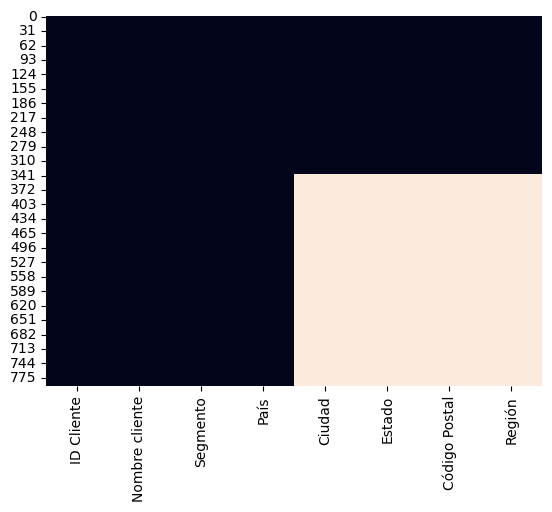

In [14]:
# Crear un mapa de calor de los valores faltantes de la tabla de mayor presencia
sns.heatmap(df_clientes.isnull(), cbar=False)
# Mostrar el mapa de calor
plt.show()

**Este es el caso de mayor dificultad, vamos a proceder a resolver los problemas individualmente**

En las columnas donde falta fecha voy a colocar el valor de la celda anterior

In [17]:
df_ventas.ffill(inplace=True)

Para la segunda tabla voy a agregar el valor que mas se repite en las columnas nulas, el caso que mas preocupa

In [19]:
df_clientes = df_clientes.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

Para la tercera tabla con valores nulos voy a borrarlos

In [21]:
df_productos = df_productos.dropna()

In [22]:
print("Valores Nulos en Ventas:", df_ventas.isnull().sum())
print("Valores Nulos en Clientes:", df_clientes.isnull().sum())
print("Valores Nulos en Productos:", df_productos.isnull().sum())
print("Valores Nulos en Poblacion:", df_pob_pib.isnull().sum())
print("Valores Nulos en RPC", df_rpc.isnull().sum())

Valores Nulos en Ventas: ID Pedido          0
Fecha compra       0
Fecha envío        0
Modo envío         0
ID Cliente         0
ID Producto        0
Precio unitario    0
Cantidad           0
dtype: int64
Valores Nulos en Clientes: ID Cliente        0
Nombre cliente    0
Segmento          0
País              0
Ciudad            0
Estado            0
Código Postal     0
Región            0
dtype: int64
Valores Nulos en Productos: ID Producto         0
Categoría           0
Sub-categoría       0
Nombre Producto     0
Coste Producción    0
dtype: int64
Valores Nulos en Poblacion: #                      0
Country                0
GDP (nominal, 2017)    0
GDP (abbrev.)          0
GDP growth             0
Population -2017       0
GDP per capita         0
Share of World GDP     0
dtype: int64
Valores Nulos en RPC Country                 0
Average monthly wage    0
dtype: int64


<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 3: ¿Cuántos registros se han eliminado de df_ventas?
<div/>

## Para este ejercicio solo elimine 3 registros de la tabla Productos, todos los demas datos fueron sustituidos por valores proximos y por los mas repetidos.

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 4: ¿Existen registros duplicados en nuestros datos? Si es así limpie la
información de esta información redundante.
<div/>

In [26]:
print("Duplicados en Ventas:", df_ventas.duplicated().sum())
print("Duplicados en Clientes:", df_clientes.duplicated().sum())
print("Duplicados en Productos:", df_productos.duplicated().sum())
print("Duplicados en Poblacion:", df_pob_pib.duplicated().sum())
print("Duplicados en RPC", df_rpc.duplicated().sum())

Duplicados en Ventas: 1
Duplicados en Clientes: 0
Duplicados en Productos: 1
Duplicados en Poblacion: 0
Duplicados en RPC 0


## Eliminamos duplicados

In [28]:
df_ventas.drop_duplicates(inplace=True)

In [29]:
df_productos.drop_duplicates(inplace=True)

In [30]:
print("Duplicados en Ventas:", df_ventas.duplicated().sum())
print("Duplicados en Clientes:", df_clientes.duplicated().sum())
print("Duplicados en Productos:", df_productos.duplicated().sum())
print("Duplicados en Poblacion:", df_pob_pib.duplicated().sum())
print("Duplicados en RPC", df_rpc.duplicated().sum())

Duplicados en Ventas: 0
Duplicados en Clientes: 0
Duplicados en Productos: 0
Duplicados en Poblacion: 0
Duplicados en RPC 0


<div style="background-color:#aab7b8; padding:10px;">
Varios campos de nuestros dataframes contienen datos numéricos, pero en algunos casos, puede que se hayan interpretado como strings debido al separador decimal “,” en lugar de “.”, contienen algún espacio o bien contienen el símbolo “$”.
<br>
    <br>
PREGUNTA 5: Transforme las columnas implicadas para que pueda modificar el tipo de datos de los campos que deben ser numéricos. ¿Qué campos ha tenido que modificar?
<div/>

In [32]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9993 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID Pedido        9993 non-null   object        
 1   Fecha compra     9993 non-null   datetime64[ns]
 2   Fecha envío      9993 non-null   datetime64[ns]
 3   Modo envío       9993 non-null   object        
 4   ID Cliente       9993 non-null   object        
 5   ID Producto      9993 non-null   object        
 6   Precio unitario  9993 non-null   object        
 7   Cantidad         9993 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 702.6+ KB


In [33]:
df_ventas.head(5)

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,"261,96",2
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,"731,94",3
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,"14,62",2
3,US-2015-108966,2019-10-11,2020-06-16 00:00:00,Standard Class,SO-20335,FUR-TA-10000577,"957,5775",5
4,US-2015-108966,2019-10-11,2019-10-18 00:00:00,Standard Class,SO-20335,OFF-ST-10000760,"22,368",2


In [34]:
df_ventas["Precio unitario"] = df_ventas["Precio unitario"].str.replace(",", ".")

In [35]:
df_ventas["Precio unitario"] = pd.to_numeric(df_ventas["Precio unitario"])

In [36]:
df_ventas.head(5)

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.9600,2
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.9400,3
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,14.6200,2
3,US-2015-108966,2019-10-11,2020-06-16 00:00:00,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5
4,US-2015-108966,2019-10-11,2019-10-18 00:00:00,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2


In [37]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Cliente      793 non-null    object 
 1   Nombre cliente  793 non-null    object 
 2   Segmento        793 non-null    object 
 3   País            793 non-null    object 
 4   Ciudad          793 non-null    object 
 5   Estado          793 non-null    object 
 6   Código Postal   793 non-null    float64
 7   Región          793 non-null    object 
dtypes: float64(1), object(7)
memory usage: 49.7+ KB


In [38]:
df_clientes.head(5)

,ID Cliente,Nombre cliente,Segmento,País,Ciudad,Estado,Código Postal,Región
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South
1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West
2,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South
3,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West
4,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South


In [39]:
df_productos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1861 entries, 0 to 1862
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID Producto       1861 non-null   object 
 1   Categoría         1861 non-null   object 
 2   Sub-categoría     1861 non-null   object 
 3   Nombre Producto   1861 non-null   object 
 4   Coste Producción  1861 non-null   float64
dtypes: float64(1), object(4)
memory usage: 87.2+ KB


In [40]:
df_productos.head(5)

,ID Producto,Categoría,Sub-categoría,Nombre Producto,Coste Producción
0,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156
1,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730
2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,11.746474
3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,608.528822
4,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,12.728871


In [41]:
df_pob_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   #                    189 non-null    int64 
 1   Country              189 non-null    object
 2   GDP (nominal, 2017)  189 non-null    object
 3   GDP (abbrev.)        189 non-null    object
 4   GDP growth           189 non-null    object
 5   Population -2017     189 non-null    object
 6   GDP per capita       189 non-null    object
 7   Share of World GDP   189 non-null    object
dtypes: int64(1), object(7)
memory usage: 11.9+ KB


In [42]:
df_pob_pib.head(5)

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population -2017,GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,"325,084,756","$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,"1,421,021,791","$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,"127,502,725","$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,"82,658,409","$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,"1,338,676,785","$1,980",3.28%


In [43]:
df_pob_pib.rename(columns={"GDP (nominal, 2017)":"PIB", "Population -2017":"Poblacion"}, inplace=True)

In [44]:
df_pob_pib.head(5)

,#,Country,PIB,GDP (abbrev.),GDP growth,Poblacion,GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,"325,084,756","$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,"1,421,021,791","$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,"127,502,725","$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,"82,658,409","$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,"1,338,676,785","$1,980",3.28%


In [45]:
df_pob_pib["PIB"] = df_pob_pib["PIB"].str.replace("$", "")
df_pob_pib["PIB"] = df_pob_pib["PIB"].str.replace(",", ".")

In [46]:
df_pob_pib["PIB"] = df_pob_pib["PIB"].str.replace('.', '').str.replace(',', '.').astype(float)

In [47]:
df_pob_pib["PIB"] = pd.to_numeric(df_pob_pib["PIB"])

In [48]:
df_pob_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   189 non-null    int64  
 1   Country             189 non-null    object 
 2   PIB                 189 non-null    float64
 3   GDP (abbrev.)       189 non-null    object 
 4   GDP growth          189 non-null    object 
 5   Poblacion           189 non-null    object 
 6   GDP per capita      189 non-null    object 
 7   Share of World GDP  189 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 11.9+ KB


In [49]:
df_pob_pib["Poblacion"] = df_pob_pib["Poblacion"].str.replace("$", "")
df_pob_pib["Poblacion"] = df_pob_pib["Poblacion"].str.replace(",", ".")

In [50]:
df_pob_pib["Poblacion"] = df_pob_pib["Poblacion"].str.replace('.', '').str.replace(',', '.').astype(float)

In [51]:
df_pob_pib["Poblacion"] = pd.to_numeric(df_pob_pib["Poblacion"])

In [52]:
df_pob_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   189 non-null    int64  
 1   Country             189 non-null    object 
 2   PIB                 189 non-null    float64
 3   GDP (abbrev.)       189 non-null    object 
 4   GDP growth          189 non-null    object 
 5   Poblacion           151 non-null    float64
 6   GDP per capita      189 non-null    object 
 7   Share of World GDP  189 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 11.9+ KB


In [53]:
df_rpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               36 non-null     object
 1   Average monthly wage  36 non-null     object
dtypes: object(2)
memory usage: 708.0+ bytes


In [54]:
df_rpc.head(5)

,Country,Average monthly wage
0,Switzerland,"$7,466"
1,Luxembourg,"$5,583"
2,Norway,"$5,418"
3,Denmark,"$5,310"
4,United States,"$4,893"


In [55]:
df_rpc["Average monthly wage"] = df_rpc["Average monthly wage"].str.replace("$", "")
df_rpc["Average monthly wage"] = df_rpc["Average monthly wage"].str.replace(",", ".")
df_rpc["Average monthly wage"] = df_rpc["Average monthly wage"].str.replace('.', '').str.replace(',', '.').astype(float)

In [56]:
df_rpc["Average monthly wage"] = pd.to_numeric(df_rpc["Average monthly wage"])

In [57]:
df_rpc.head(5)

,Country,Average monthly wage
0,Switzerland,7466.0
1,Luxembourg,5583.0
2,Norway,5418.0
3,Denmark,5310.0
4,United States,4893.0


In [58]:
df_rpc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               36 non-null     object 
 1   Average monthly wage  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


<div style="background-color:lightgreen; padding:10px;">
Es el momento de analizar nuestros datos desde el punto de vista estadístico, en
primer lugar, visualice los diferentes dataframes para obtener los principales
datos estadísticos (Recordatorio: método describe).
PREGUNTA 6: Cree una columna en df_ventas (Importe) para calcular el importe
total de venta de cada pedido (Precio unitario x cantidad). ¿Cuál es la mediana
del importe de nuestras ventas?
<div/>

In [60]:
df_ventas.head(2)

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.96,2
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.94,3


In [61]:
df_ventas["Importe"] = df_ventas["Precio unitario"]*df_ventas["Cantidad"]

In [62]:
df_ventas.head(2)

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.96,2,523.92
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.94,3,2195.82


In [63]:
df_ventas.describe()

,Fecha compra,Fecha envío,Precio unitario,Cantidad,Importe
count,9993,9993,9993.000000,9993.000000,9993.000000
mean,2020-04-30 01:38:16.607625472,2020-05-04 00:30:34.764335104,229.776146,3.843190,1172.749600
min,2018-01-03 00:00:00,2018-01-07 00:00:00,0.000000,1.000000,0.000000
25%,2019-05-23 00:00:00,2019-05-27 00:00:00,17.240000,2.000000,48.580000
50%,2020-06-26 00:00:00,2020-06-29 00:00:00,54.384000,3.000000,183.456000
75%,2021-05-14 00:00:00,2021-05-18 00:00:00,209.930000,5.000000,764.923500
max,2021-12-30 00:00:00,2022-01-05 00:00:00,22638.480000,40.000000,135830.880000
std,NaN,NaN,623.268281,2.660261,4023.267242


<div style="background-color:#aab7b8; padding:10px;">
Nuestra empresa ha decidido que la cantidad máxima de unidades de pedido
que puede tramitar a un cliente es de 13 unidades, por tanto, si en nuestros datos
existen registros con número de unidades mayor, es un outlier y es un dato no
válido para los análisis posteriores.
<br>
    <br>
PREGUNTA 8: ¿Cuántos pedidos se han realizado con un número de unidades
mayor que 13?
<div/>

In [65]:
df_ventas[df_ventas["Cantidad"]>13].count()

ID Pedido          29
Fecha compra       29
Fecha envío        29
Modo envío         29
ID Cliente         29
ID Producto        29
Precio unitario    29
Cantidad           29
Importe            29
dtype: int64

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 9: Realiza la limpieza del dataframe df_ventas de tal manera que
descartemos los registros con unidades > 13. 
    <br>
    <br>
    ¿Cuáles son las nuevas dimensiones
del dataframe?
<div/>

In [67]:
df_ventas = df_ventas[df_ventas["Cantidad"]<=13]

In [68]:
df_ventas.shape

(9964, 9)

In [69]:
df_ventas[df_ventas["Cantidad"]>13].count()

ID Pedido          0
Fecha compra       0
Fecha envío        0
Modo envío         0
ID Cliente         0
ID Producto        0
Precio unitario    0
Cantidad           0
Importe            0
dtype: int64

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 10: En algunos pedidos, no está registrada la “Fecha de envío”, por
tanto se deben completar esos registros como la “Fecha compra” + mediana
Resultado: Existen un total de 29 pedidos que han superado las 13 unidades:
Resultado:
de la diferencia entre “Fecha de envio” - “Fecha compra” del resto de pedidos
(debe crear una columna auxiliar “Dif_env_comp” con la diferencia para
obtener la mediana, después utilice el método fillna() sobre “Fecha envío” de
tal manera que complete los vacíos como “Fecha compra” + Mediana_dif)
Una vez tenga completada la “Fecha de envío”, recalcule la columna
“Dif_env_comp”.
<div/>

In [71]:
df_ventas.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,523.9200
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,2195.8200
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,29.2400
3,US-2015-108966,2019-10-11,2020-06-16 00:00:00,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,4787.8875
4,US-2015-108966,2019-10-11,2019-10-18 00:00:00,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,44.7360


In [72]:
df_ventas["Dif_env_comp"] = df_ventas["Fecha envío"] - df_ventas["Fecha compra"]

In [73]:
df_ventas["Dif_env_comp"].mean()

Timedelta('3 days 22:51:31.649939783')

In [74]:
df_ventas["Fecha envío"].fillna(df_ventas["Fecha compra"]+df_ventas["Dif_env_comp"].mean(), inplace=True)

In [75]:
df_ventas.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,523.9200,3 days 05:00:00
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,2195.8200,3 days 00:00:00
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,29.2400,4 days 00:00:00
3,US-2015-108966,2019-10-11,2020-06-16 00:00:00,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,4787.8875,249 days 00:00:00
4,US-2015-108966,2019-10-11,2019-10-18 00:00:00,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,44.7360,7 days 00:00:00


In [76]:
df_ventas["Dif_env_comp"] = df_ventas["Fecha envío"] - df_ventas["Fecha compra"]

In [77]:
df_ventas["Dif_env_comp"].mean()

Timedelta('3 days 22:51:31.649939783')

In [78]:
df_ventas.head()

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.9600,2,523.9200,3 days 05:00:00
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.9400,3,2195.8200,3 days 00:00:00
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,14.6200,2,29.2400,4 days 00:00:00
3,US-2015-108966,2019-10-11,2020-06-16 00:00:00,Standard Class,SO-20335,FUR-TA-10000577,957.5775,5,4787.8875,249 days 00:00:00
4,US-2015-108966,2019-10-11,2019-10-18 00:00:00,Standard Class,SO-20335,OFF-ST-10000760,22.3680,2,44.7360,7 days 00:00:00


# PASO 4: Visualización de datos
# PASO 5: Análisis y conclusiones

En base a la información consolidada de la que ya disponemos, como data
scientist utilizando Pandas nos gustaría tener una tabla maestra que agregara
las diferentes tablas y realizar sus análisis.

En primer lugar, se deben combinar los dataframes df_ventas, df_prod y
df_clientes para obtener un único dataframe global denominado df_global
(utilice el método inner, puede usar merge para combinar dataframes de
manera anidada o bien paso a paso, primero combinar 2 dataframes y con el
resultado combinarlo con el 3er dataframe).

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 11: ¿Qué país representa el mayor volumen de nuestras ventas?
(puedes usar el método .nlargest(x) tras su sentencia groupby donde x es el
número de elementos a devolver en orden descendente)
<div/>

In [83]:
df_global = df_ventas.merge(df_clientes, on="ID Cliente", how="inner").merge(df_productos, on="ID Producto", how="inner")

In [84]:
df_global.head(3)

,ID Pedido,Fecha compra,Fecha envío,Modo envío,ID Cliente,ID Producto,Precio unitario,Cantidad,Importe,Dif_env_comp,...,Segmento,País,Ciudad,Estado,Código Postal,Región,Categoría,Sub-categoría,Nombre Producto,Coste Producción
0,CA-2016-152156,2020-11-08,2020-11-11 05:00:00,Second Class,CG-12520,FUR-BO-10001798,261.96,2,523.92,3 days 05:00:00,...,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,230.098156
1,CA-2016-152156,2020-11-08,2020-11-11 00:00:00,Second Class,CG-12520,FUR-CH-10000454,731.94,3,2195.82,3 days 00:00:00,...,Consumer,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",563.102730
2,CA-2016-138688,2020-06-12,2020-06-16 00:00:00,Second Class,DV-13045,OFF-LA-10000240,14.62,2,29.24,4 days 00:00:00,...,Corporate,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,11.746474


In [85]:
df_global.groupby("País")["Importe"].agg("sum").nlargest(5)

País
United States    5.356258e+06
Germany          3.443995e+06
Spain            1.976774e+06
Romania          5.202897e+05
Name: Importe, dtype: float64

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 12: ¿En qué año se han obtenido un mayor número de ventas?
(puede insertar una función lambda dentro del argumento de groupby para
obtener el año de cada fecha: df_global["Fecha compra"].map(lambda x:
x.year) )
<div/>

In [87]:
df_global.groupby(df_global["Fecha compra"].map(lambda x: x.year))["Importe"].agg("sum")

Fecha compra
2018    2.409020e+06
2019    2.347306e+06
2020    3.011992e+06
2021    3.528999e+06
Name: Importe, dtype: float64

<div style="background-color:#aab7b8; padding:10px;">
PREGUNTA 13: Teniendo en cuenta el precio de venta unitario, las unidades
vendidas y el coste unitario, nos solicitan obtener el beneficio obtenido en cada
uno de los pedidos. Para ello debe crear una nueva columna “Beneficio”. ¿Cuál
es la categoría de productos que supone un mayor beneficio?
<div/>

In [89]:
df_global["Beneficio"] = (df_global["Precio unitario"] - df_global["Coste Producción"]) * df_global["Cantidad"]

In [90]:
df_global.groupby("Categoría")["Beneficio"].agg("sum").nlargest(5)

Categoría
Furniture          1.595747e+06
Technology         1.433013e+06
Office Supplies    1.290397e+06
Name: Beneficio, dtype: float64

In [91]:
df_resumen = df_global.groupby(["Categoría","País"])["Beneficio"].agg("sum").to_frame()
df_resumen

Beneficio
Categoría       País                        
Furniture       Germany        441296.278063
                Romania         86856.519394
                Spain          281087.457956
                United States  786506.706828
Office Supplies Germany        502295.029687
                Romania         39880.819509
                Spain          158683.421832
                United States  589538.137941
Technology      Germany        462599.528711
                Romania         48038.620395
                Spain          273800.359628
                United States  648574.141504

In [92]:
df_resumen.to_excel(r'/home/kali-1/Proyectos DataScience/Curso Panda+Numpy/Datas/Reporte Bneficios.xlsx', sheet_name="Beneficios")